# Matrix Representations Of Networks

When we work with networks, we need a way to represent them mathematically and in our code. A network itself lives in network space, which is just the set of all possible networks. Network space is kind of abstract and inconvenient if we want to use traditional mathematics, so we'd generally like to represent networks with groups of numbers to make everything more concrete.

More specifically, we would often like to represent networks with *matrices*. In addition to being computationally convenient, using matrices to represent networks lets us bring in a surprising amount of tools from linear algebra and statistics. Programmatically, using matrices also lets us use common Python tools for array manipulation like numpy.

The most common matrix representation of a network is called the Adjacency Matrix, and we'll learn about that first.

## The Adjacency Matrix

The beating heart of matrix representations for networks throughout this book is the adjacency matrix. The idea is pretty straightforward: Let's say you have a network with $n$ nodes. You give each node an index -- usually some value between 0 and n -- and then you create an $n \times n$ matrix. If there is an edge between node $i$ and node $j$, you fill the $(i, j)_{th}$ value of the matrix with an entry, usually $1$ if your network has unweighted edges. In the case of undirected networks, you end up with a symmetric matrix with full of 1's and 0's, which completely represents the topology of your network.

Let's see this in action. We'll make a network with only three nodes, since that's small and easy to understand, and then we'll show what it looks like as an adjacency matrix.

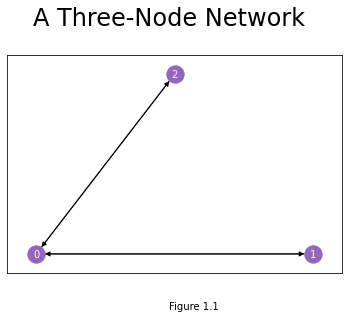

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("0", pos=(1,1))
G.add_node("1", pos=(4,4))
G.add_node("2", pos=(4,2))
G.add_edge("0", "1")
G.add_edge("1", "0")
G.add_edge("0", "2")
G.add_edge("2", "0")

pos = {'0': (0, 0), '1': (1, 0), '2': (.5, .5)}

nx.draw_networkx(G, with_labels=True, node_color="tab:purple", pos=pos,
                font_size=10, font_color="whitesmoke", arrows=True, edge_color="black",
                width=1)
A = np.asarray(nx.to_numpy_matrix(G))

plt.figtext(0.5, 0, "Figure 1.1")
plt.suptitle("A Three-Node Network", fontsize=24, y=1.05);

plt.savefig("/Users/alex/Dropbox/thesis_pdf/figures/fig_1-1.png", dpi=300, transparent=False, bbox_inches='tight')

Our network has three nodes, labeled $1$, $2$, and $3$. Each of these three nodes is either connected or not connected to each of the two other nodes. We'll make a square matrix $A$, with 3 rows and 3 columns, so that each node has its own row and column associated to it.

So, let's fill out the matrix. We start with the first row, which corresponds to the first node, and move along the columns. If there is an edge between the first node and the node whose index matches the current column, put a 1 in the current location. If the two nodes aren't connected, add a 0. When you're done with the first row, move on to the second. Keep going until the whole matrix is filled with 0's and 1's. 

The end result looks like the matrix below. Since the second and third nodes aren't connected, there is a $0$ in locations $A_{2, 1}$ and $A_{1, 2}$. There are also zeroes along the diagonals, since nodes don't have edges with themselves.

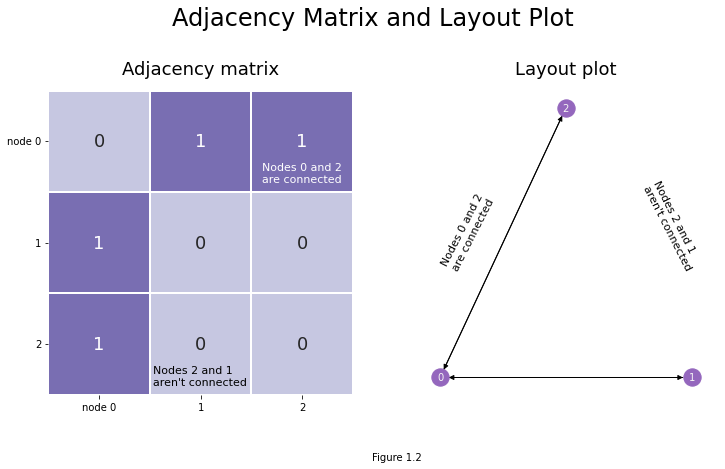

In [3]:
from graphbook_code import heatmap
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(12,6))
ax1 = heatmap(A, annot=True, linewidths=.1, cbar=False, ax=axs[0], title="Adjacency matrix", 
               xticklabels=True, yticklabels=True);
ax1.tick_params(axis='y', labelrotation=360)

# ticks
yticks = ax1.get_yticklabels()
yticks[0].set_text('node 0')
ax1.set_yticklabels(yticks)

xticks = ax1.get_xticklabels()
xticks[0].set_text('node 0')
ax1.set_xticklabels(xticks)

ax1.annotate("Nodes 0 and 2 \nare connected", (2.1, 0.9), color='white', fontsize=11)
ax1.annotate("Nodes 2 and 1 \naren't connected", (1.03, 2.9), color='black', fontsize=11)

ax2 = nx.draw_networkx(G, with_labels=True, node_color="tab:purple", pos=pos,
                font_size=10, font_color="whitesmoke", arrows=True, edge_color="black",
                width=1, ax=axs[1])

ax2 = plt.gca()
ax2.text(0, 0.2, s="Nodes 0 and 2 \nare connected", color='black', fontsize=11, rotation=63)
ax2.text(.8, .2, s="Nodes 2 and 1 \naren't connected", color='black', fontsize=11, rotation=-63)
ax2.set_title("Layout plot", fontsize=18)
sns.despine(ax=ax2, left=True, bottom=True)

plt.figtext(0.5, 0, "Figure 1.2")
plt.suptitle("Adjacency Matrix and Layout Plot", fontsize=24, y=1.05)
plt.savefig("/Users/alex/Dropbox/thesis_pdf/figures/fig_1-2.png", dpi=300, transparent=False, bbox_inches='tight')

Although the adjacency matrix is straightforward and easy to understand, it isn't the only way to represent networks.

## The Incidence Matrix

Instead of having values in a symmetric matrix represent possible edges, like with the Adjacency Matrix, we could have rows represent nodes and columns represent edges. This is called the *Incidence Matrix*, and it's useful to know about -- although it won't appear too much in this book. If there are $n$ nodes and $m$ edges, you make an $n \times m$ matrix. Then, to determine whether a node is a member of a given edge, you'd go to that node's row and the edge's column. If the entry is nonzero ($1$ if the network is unweighted), then the node is a member of that edge, and if there's a $0$, the node is not a member of that edge.

You can see the incidence matrix for our network below. Notice that with incidence plots, edges are (generally arbitrarily) assigned indices as well as nodes.

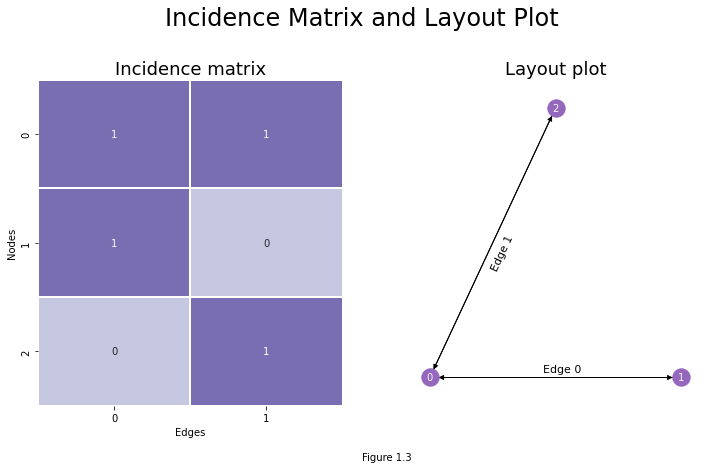

In [4]:
from networkx.linalg.graphmatrix import incidence_matrix
cmap = sns.color_palette("Purples", n_colors=2)

I = incidence_matrix(nx.Graph(A)).toarray().astype(int)

fig, axs = plt.subplots(1, 2, figsize=(12,6))

plot = sns.heatmap(I, annot=True, linewidths=.1, cmap=cmap,
                   cbar=False, xticklabels=True, yticklabels=True, ax=axs[0]);
plot.set_xlabel("Edges")
plot.set_ylabel("Nodes")
plot.set_title("Incidence matrix", fontsize=18)

ax2 = nx.draw_networkx(G, with_labels=True, node_color="tab:purple", pos=pos,
                font_size=10, font_color="whitesmoke", arrows=True, edge_color="black",
                width=1, ax=axs[1])

ax2 = plt.gca()
ax2.text(.24, 0.2, s="Edge 1", color='black', fontsize=11, rotation=65)
ax2.text(.45, 0.01, s="Edge 0", color='black', fontsize=11)
ax2.set_title("Layout plot", fontsize=18)
sns.despine(ax=ax2, left=True, bottom=True)
plt.figtext(0.5, 0, "Figure 1.3")
plt.suptitle("Incidence Matrix and Layout Plot", fontsize=24, y=1.05)
plt.savefig("/Users/alex/Dropbox/thesis_pdf/figures/fig_1-3.png", dpi=300, transparent=False, bbox_inches='tight')

When networks are large, incidence matrices tend to be extremely sparse -- meaning, their values are mostly 0's. This is because each column must have exactly two nonzero values along its rows: one value for the first node its edge is connected to, and another for the second. Because of this, incidence matrices are usually represented in Python computationally as scipy's *sparse matrices* rather than as numpy arrays, since this data type is much better-suited for matrices which contain mostly zeroes.

You can also add orientation to incidence matrices, even in undirected networks, which we'll discuss next.

## The Oriented Incidence Matrix

The oriented incidence matrix is extremely similar to the normal incidence matrix, except that you assign a direction or orientation to each edge: you define one of its nodes as being the head node, and the other as being the tail. For undirected networks, you can assign directionality arbitrarily. Then, for the column in the incidence matrix corresponding to a given edge, the tail node has a value of $-1$, and the head node has a value of $0$. Nodes who aren't a member of a particular edge are still assigned values of $0$.

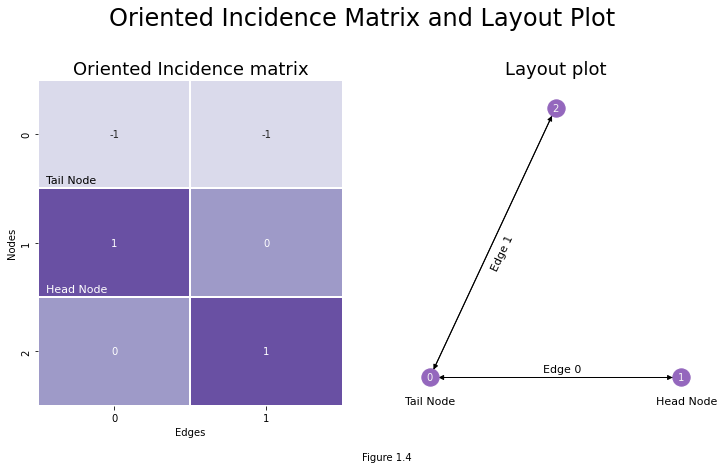

In [5]:
from networkx.linalg.graphmatrix import incidence_matrix
cmap = sns.color_palette("Purples", n_colors=3)

OI = incidence_matrix(nx.Graph(A), oriented=True).toarray().astype(int)

fig, axs = plt.subplots(1, 2, figsize=(12,6))

plot = sns.heatmap(OI, annot=True, linewidths=.1, cmap=cmap,
                   cbar=False, xticklabels=True, yticklabels=True, ax=axs[0]);
plot.set_xlabel("Edges")
plot.set_ylabel("Nodes")
plot.set_title("Oriented Incidence matrix", fontsize=18)
plot.annotate("Tail Node", (.05, .95), color='black', fontsize=11)
plot.annotate("Head Node", (.05, 1.95), color='white', fontsize=11)

ax2 = nx.draw_networkx(G, with_labels=True, node_color="tab:purple", pos=pos,
                font_size=10, font_color="whitesmoke", arrows=True, edge_color="black",
                width=1, ax=axs[1])

ax2 = plt.gca()
ax2.text(.24, 0.2, s="Edge 1", color='black', fontsize=11, rotation=65)
ax2.text(.45, 0.01, s="Edge 0", color='black', fontsize=11)
ax2.set_title("Layout plot", fontsize=18)
sns.despine(ax=ax2, left=True, bottom=True)
ax2.text(-.1, -.05, s="Tail Node", color='black', fontsize=11)
ax2.text(.9, -.05, s="Head Node", color='black', fontsize=11)
plt.figtext(0.5, 0, "Figure 1.4")
plt.suptitle("Oriented Incidence Matrix and Layout Plot", fontsize=24, y=1.05)
plt.savefig("/Users/alex/Dropbox/thesis_pdf/figures/fig_1-4.png", dpi=300, transparent=False, bbox_inches='tight')

Although we won't use incidence matrices, oriented or otherwise, in this book too much, we introduced them because there's a deep connection between incidence matrices, adjacency matrices, and a matrix representation that we haven't introduced yet called the Laplacian. Before we can explore that connection, we'll discuss one more representation: the degree matrix.